# 📓 Notebook 02 – Outils et Visualisations DR5

> But : Ce notebook regroupe les outils interactifs développés pour explorer, diagnostiquer et affiner les spectres téléchargés du catalogue LAMOST DR5, sans relancer le pipeline complet.  
> Il est destiné à l’analyse exploratoire rapide, à la visualisation augmentée, et au debug scientifique.

<br/>

## ⚙️ Setup & Imports
L'environnement est initialisé dynamiquement avec détection de la racine du projet et ajout du dossier ``src/`` au ``sys.path``.  
On y importe les classes utilitaires ``AstroVisualizer`` et ``setup_project_env``.

In [1]:
import os
import sys

# Ajout du chemin vers 'src' pour trouver nos modules
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import de notre outil de setup et de notre outil de visualisation
from utils import setup_project_env
from tools.visualizer import AstroVisualizer

# On importe les outils d'affichage dont on a besoin dans le notebook
from IPython.display import display, Markdown

# Initialisation
paths = setup_project_env()
visualizer = AstroVisualizer(paths)

print("\n Setup terminé. Outils prêts à l'emploi.")

[INFO] Racine du projet détectée : c:\Users\alexb\Documents\Google_Cloud\alex_labs_google_sprint\astro_spectro_git
[INFO] Dossier 'src' ajouté au sys.path.

 Setup terminé. Outils prêts à l'emploi.


#

## 🧠 Explorateur de Header FITS

Outil interactif permettant de charger dynamiquement un spectre ``.fits.gz`` et d’en afficher les métadonnées structurées.

### **Utilisation typique :**

- Vérifier la cohérence des champs : coordonnées, type d’objet, date, filtre, seeing…
- Déboguer un spectre problématique
- Détecter des valeurs aberrantes avant traitement massif

*Compatible avec les headers compressés grâce à ``astropy.io.fits.``*

In [ ]:
display(Markdown("## Explorateur de Header FITS"))
display(Markdown("Utilisez le menu déroulant pour sélectionner un spectre et afficher ses métadonnées complètes."))
visualizer.interactive_header_explorer()

#

## ⚗️ Tuning Interactif des Raies Spectrales

Permet d’ajuster en direct les paramètres de détection des raies spectrales :

- **Prominence** (hauteur minimale pour détecter un pic)
- **Fenêtre** (largeur du sliding window autour du pic)

**Objectif : tester visuellement les hyperparamètres avant traitement global du dataset.**

### L’interface comprend :

- un menu de sélection du spectre
- deux sliders ``ipwidgets``
- un tracé du spectre avec surlignement automatique des pics détectés

#

In [2]:
display(Markdown("--- \n## Analyseur de Spectre Augmenté"))
display(Markdown(
    "Cet outil tout-en-un vous permet de visualiser un spectre, d'ajuster les "
    "paramètres de détection de pics en temps réel, et d'évaluer la qualité "
    "des données et de l'analyse."
))

# Cet appel unique crée maintenant l'interface complète
visualizer.interactive_spectrum_analyzer()

--- 
## Analyseur de Spectre Augmenté

Cet outil tout-en-un vous permet de visualiser un spectre, d'ajuster les paramètres de détection de pics en temps réel, et d'évaluer la qualité des données et de l'analyse.

interactive(children=(Dropdown(description='Spectre :', layout=Layout(width='max-content'), options=('B6202/sp…

#

## 🧼 Analyse des Features Nulles
Analyse de qualité des données extraites, avec graphique à barres des colonnes avec trop de valeurs nulles ``(0.0)``.

### Ce module permet de :

- Repérer les features peu ou non utilisées
- Nettoyer les colonnes inexploitables
- Diagnostiquer les erreurs d’extraction

--- 
## Analyse de la Qualité des Features

Cet outil analyse le dernier fichier de features généré et montre le pourcentage de valeurs nulles pour chaque feature. C'est essentiel pour identifier les features peu informatives.

--- Analyse des Valeurs Nulles (Zéros) dans les Features ---
  > Analyse du fichier : features_20250724T012617Z.csv


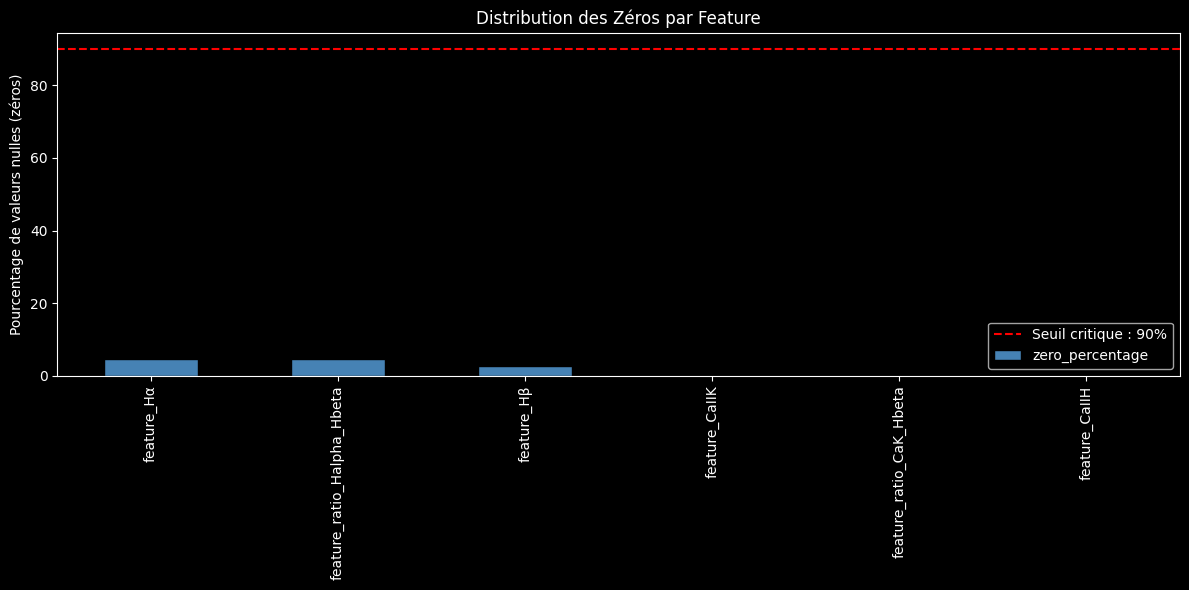

In [3]:
display(Markdown("--- \n## Analyse de la Qualité des Features"))
display(Markdown("Cet outil analyse le dernier fichier de features généré et montre le pourcentage de valeurs nulles pour chaque feature. C'est essentiel pour identifier les features peu informatives."))
visualizer.analyze_feature_zeros()

#

## 🌌 Carte de Couverture Céleste

Affiche une **projection Mollweide** des plans d’observation inclus dans les spectres téléchargés.

- Axe horizontal : Ascension Droite (RA)
- Axe vertical : Déclinaison (Dec)
- Couleur & taille : nombre de spectres par plan

💡 Permet de visualiser la densité des données acquises sur la voûte céleste.

--- 
## Carte de Couverture Céleste

Cette carte montre la position des plans d'observation que tu as téléchargés. La taille et la couleur des points indiquent le nombre de spectres par plan.

--- Carte de Couverture Céleste ---
  > Catalogue de position existant chargé.


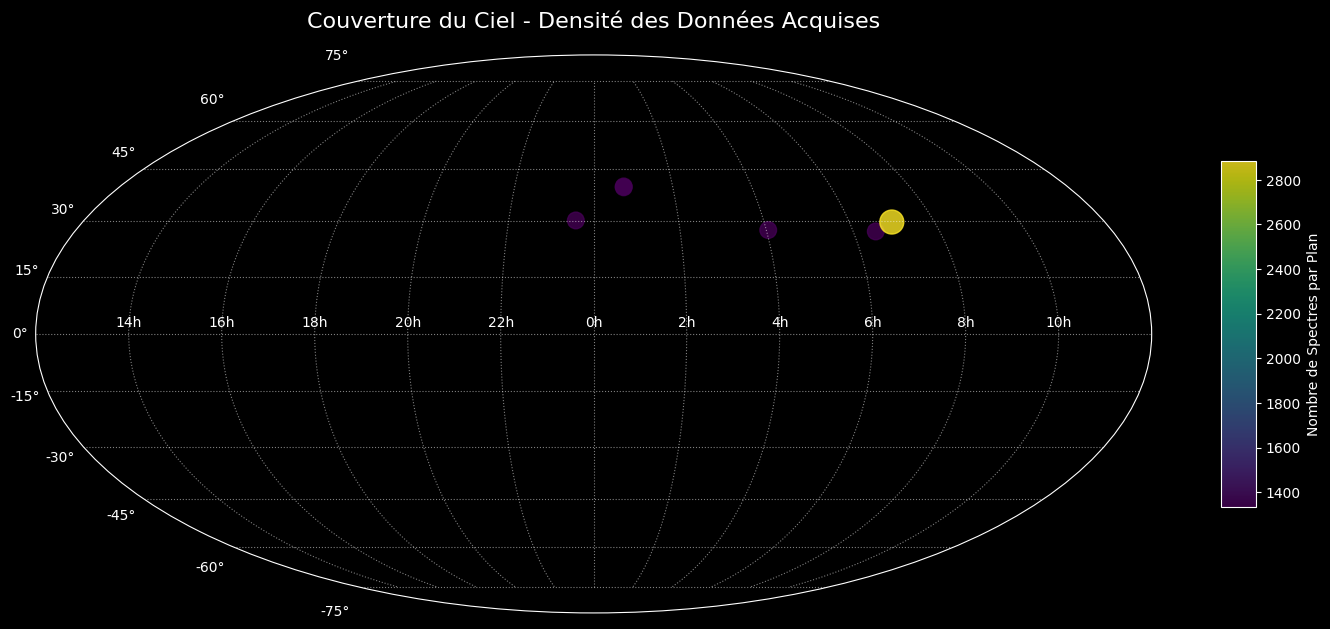

In [11]:
display(Markdown("--- \n## Carte de Couverture Céleste"))
display(Markdown("Cette carte montre la position des plans d'observation que tu as téléchargés. La taille et la couleur des points indiquent le nombre de spectres par plan."))
visualizer.plot_sky_coverage()

#

## 🔎 Inspecteur de Modèles Entraînés

Outil permettant d'explorer les modèles sauvegardés ``.pkl`` :

- Visualisation des hyperparamètres
- Affichage de la feature importance (triée)

**Très utile pour analyser la qualité du classifieur, l’importance des raies spectrales, et affiner le feature engineering.**

In [4]:
display(Markdown("--- \n## Inspecteur de Modèles Entraînés"))
display(Markdown(
    "Utilisez le menu déroulant pour sélectionner un modèle `.pkl` sauvegardé. "
    "Cet outil affichera ses hyperparamètres et un graphique montrant l'importance de chaque feature "
    "pour la classification."
))

# Cet appel unique crée l'interface d'inspection
visualizer.interactive_model_inspector()

--- 
## Inspecteur de Modèles Entraînés

Utilisez le menu déroulant pour sélectionner un modèle `.pkl` sauvegardé. Cet outil affichera ses hyperparamètres et un graphique montrant l'importance de chaque feature pour la classification.

interactive(children=(Dropdown(description='model_path', options=('c:\\Users\\alexb\\Documents\\Google_Cloud\\…